In [62]:
# Name: Lilli Nappi
# CWID: 20006502
# HW06_RF

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [44]:
# Loading dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')
# df.head()
# print(df.describe())
# #data preprocessing
df['Class'] = pd.Categorical(df['Class'])  # convert Class column to categorical data type
df = df.drop('Sample', axis=1)
df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [45]:
# Find column with at least one NaN
df = df.replace(['?'], None)
missing_values = df.isnull().any()
print(missing_values)

F1       False
F2       False
F3       False
F4       False
F5       False
F6        True
F7       False
F8       False
F9       False
Class    False
dtype: bool


In [46]:
# # # Replace missing values with the mean of the column
df = df.apply(pd.to_numeric, errors='coerce')
df['F6'].fillna(df['F6'].mean(),inplace=True)
df.fillna(df.mean(), inplace=True)
print("\n check for missing value again")
missing_values = df.isnull().any()
print(missing_values)


 check for missing value again
F1       False
F2       False
F3       False
F4       False
F5       False
F6       False
F7       False
F8       False
F9       False
Class    False
dtype: bool


<ipython-input-46-fe7504f8634c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


In [47]:
# change column label to Benign and Malignant
df['Class'] = df['Class'].map({2: 'Benign', 4: 'Malignant'})

df['F6'] = df['F6'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F1      699 non-null    int64 
 1   F2      699 non-null    int64 
 2   F3      699 non-null    int64 
 3   F4      699 non-null    int64 
 4   F5      699 non-null    int64 
 5   F6      699 non-null    int64 
 6   F7      699 non-null    int64 
 7   F8      699 non-null    int64 
 8   F9      699 non-null    int64 
 9   Class   699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [48]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F1      699 non-null    int64
 1   F2      699 non-null    int64
 2   F3      699 non-null    int64
 3   F4      699 non-null    int64
 4   F5      699 non-null    int64
 5   F6      699 non-null    int64
 6   F7      699 non-null    int64
 7   F8      699 non-null    int64
 8   F9      699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   699 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Class_Malignant
False    458
True     241
Name: count, dtype: int64


,Class_Malignant
0,False
1,False
2,False
3,False
4,False


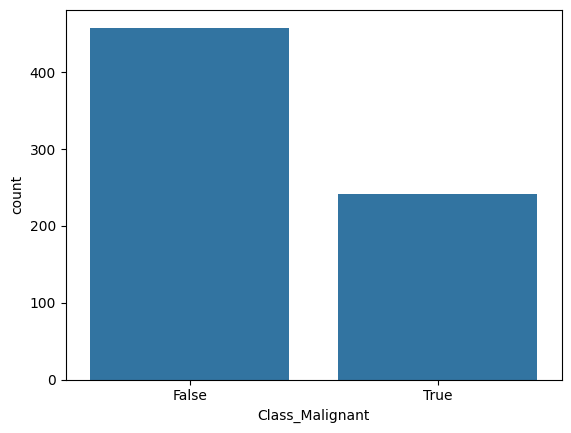

In [49]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['Class_Malignant'].value_counts())
sns.countplot(data=df_obj, x='Class_Malignant')
df_obj.head()

In [50]:
attr = df_num
target = df_obj['Class_Malignant']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

In [60]:
# Use the C5.0 methodology to develop a classification model for the Diagnosis
model = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[136   3]
 [  5  66]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       139
        True       0.96      0.93      0.94        71

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



In [ ]:
#Use the Random Forest methodology to develop a classification model for the Diagnosis
model = RandomForestClassifier(n_estimators=100,random_state=8)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[133   6]
 [  4  67]]
              precision    recall  f1-score   support

       False       0.97      0.96      0.96       139
        True       0.92      0.94      0.93        71

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



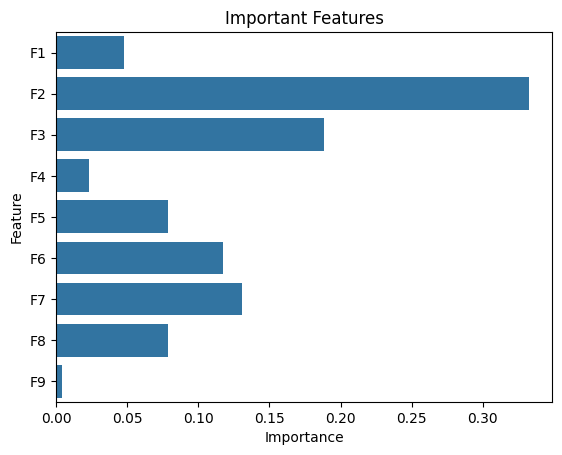

In [57]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': attr.columns, 'Importance': model.feature_importances_})

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Important Features')
plt.show()

In [59]:
# Display feature importances
feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)
print(feature_scores)
print("The most important features are F2, F3, and F7")

F2    0.332156
F3    0.188575
F7    0.130420
F6    0.116999
F8    0.078671
F5    0.078340
F1    0.047534
F4    0.022998
F9    0.004308
dtype: float64
The most important features are F2, F3, and F7
